In [1]:
%run final_c50_MONTEMANI_CONCEPT_0302-hybridVNS081121.ipynb
#%run HSA_FOR_DVRP.ipynb

In [2]:
data = dvrp(gen("c50d.csv", delimiter=','), number_of_runs=1, number_of_iterations=10000, HMCR=0.95, PAR=0.5, HMS=300)

In [3]:
data.initial_solution()

In [4]:
# data.dictionary_harmony_memory

In [5]:
data.update_static_customers()

In [6]:
%%time
# While Loop
while data.current_time < data.depot_close_time:  # Missing or 
    
    print(f'Iterating for time: {data.current_time}')
    
    # Update time first
    data.calculate_next_time_slice()

    # Update Static Customers
    data.update_static_customers()
    
    # Add static nodes back to solutions
    data.add_static_nodes_back_to_soln()
    
    # Update the fitness dictionary to reduce computational time
    data.create_fitness_dict()
    
    #Optimize
    data.optimize()

Iterating for time: 0
vns_insertion_counter  0
vns_2opt_counter  722



Iterating for time: 14.04
vns_insertion_counter  0
vns_2opt_counter  1376



Iterating for time: 28.08
vns_insertion_counter  0
vns_2opt_counter  2686



Iterating for time: 42.12
vns_insertion_counter  0
vns_2opt_counter  893



Iterating for time: 56.16
vns_insertion_counter  0
vns_2opt_counter  1320



Iterating for time: 70.19999999999999
vns_insertion_counter  0
vns_2opt_counter  3325



Iterating for time: 84.23999999999998
vns_insertion_counter  0
vns_2opt_counter  374



Iterating for time: 98.27999999999997
vns_insertion_counter  0
vns_2opt_counter  965



Iterating for time: 112.31999999999996
vns_insertion_counter  0
vns_2opt_counter  1899



Iterating for time: 126.35999999999996
vns_insertion_counter  0
vns_2opt_counter  1072



Iterating for time: 140.39999999999995
vns_insertion_counter  0
vns_2opt_counter  1636



Iterating for time: 154.43999999999994
vns_insertion_counter  0
vns_2opt_counter  1486

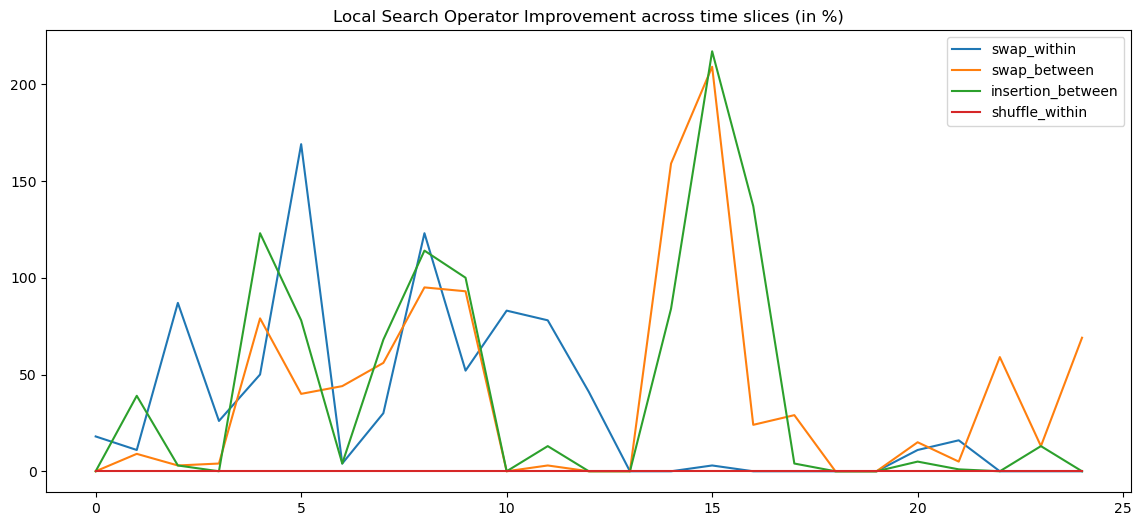

In [7]:
# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
legends = []

for ls_operator in data.historic_improvement_operators.keys():
    legends.append(ls_operator)
    plt.plot(data.historic_improvement_operators[ls_operator])
 
plt.title("Local Search Operator Improvement across time slices (in %)")
plt.legend(legends)
plt.show()

In [8]:
# print(data.dictionary_harmony_memory)

In [9]:
# a={'solution 91': {'1': [0, 48, 7, 43, 23, 46, 47, 17, 4, 19, 12, 0], '2': [0, 39, 9, 10, 15, 45, 33, 34, 29, 21, 16, 50, 32, 0], '3': [0, 37, 5, 1, 2, 20, 36, 35, 31, 8, 26, 0], '4': [0, 27, 24, 13, 18, 25, 14, 6, 0], '5': [0, 40, 41, 42, 44, 30, 49, 38, 0], '6': [0, 22, 3, 28, 11, 0]}}

In [10]:
# # Butterfly paper


# solution50={'solution 92': {'1': [0,38,9,49,10,39,30,34,21,50,16,11,0], '2': [0,47,18,13,25,14,0], '3': [0,12,5,46,0], \
#                             '4': [0,37,33,45,15,44,42,19,40,41,4,17,0], '5': [0,32,2,29,35,36,20,3,28,31,22,1,0], \
#                             '6':[0,27,48,8,26,7,43,24,23,6,0]}}

# solutionc75 = {'solution 92': {'1': [0,68,2,62,22,28,30,45,0], '2': [0,63,43,42,64,41,56,23,1,73,0], '3': [0,51,24,49,16,33,6,17,0], \
#                                '4': [0,26,58,72,39,32,40,12,0], '5': [0,11,66,65,38,10,0], '6':[0,52,27,13,57,15,20,37,5,29,0],\
#                               '7': [0,3,44,50,18,55,25,31,9,0], '8': [0,8,54,19,59,14,53,35,0], \
#                                '9': [0,74,61,69,71,60,70,36,47,21,48,0], '10': [0,67,7,46,34,4,0], '11':[0,75,0]}}

In [11]:
# sum_time=0
# for key,route in solutionc75.items():
#     for i,j in route.items():
#         total_time=0
#         capacity_sum=0
#         total_time=data.calculate_current_time(j)
#         capacity_sum=data.capacity_sum(j)
#         print(f"total_time: {total_time}")
#         print(f"capacity_sum: {capacity_sum}")
#         sum_time+=total_time
# sum_time=sum_time-(16*75)
# print(f"sum time: {sum_time}")

In [12]:
dist=data.distance(38,50)

print(dist)

11.180339887498949


In [13]:
total_nodes = 0
paper={'solution 92': {'1': [0, 38,50,34,30,9,16,21,29,2,11, 0], '2': [0, 47,4,17,42,19,40,41,13,18, 0], '3': [0, 32,1,8,26,31,28,3,36,35,20,22,46, 0], '4': [0,6,14,25,24,43,7,23,48,27,0], '5': [0,12,37,44,15,45,33,39,10,49,5,0]}}
for key, route in paper.items():
    for i, j in route.items():
#         print(j)
        count_nodes = len(j)
        print(f"count nodes: {count_nodes}")
        total_nodes+=count_nodes
    print(f"total nodes: {total_nodes}")

count nodes: 12
count nodes: 11
count nodes: 14
count nodes: 11
count nodes: 12
total nodes: 60


In [14]:
paper={'solution 92': {'1': [0, 38,50,34,30,9,16,21,29,2,11, 0], '2': [0, 47,4,17,42,19,40,41,13,18, 0], '3': [0, 32,1,8,26,31,28,3,36,35,20,22,46, 0], '4': [0,6,14,25,24,43,7,23,48,27,0], '5': [0,12,37,44,15,45,33,39,10,49,5,0]}}

In [15]:
# paper34={'solution 92': {'1': [0, 27,48,8,26,7,23,43,24,18,0], '2':[0,4,41,19,42,40,13,25,14,6,0],'3':[0,5,49,10,39,33,45,15,44,37,17,47,0],'4':[0,12,38,9,30,34,21,50,16,11,46,0],'5':[0,32,2,29,35,36,20,30,28,31,22,1,0]}}

In [16]:
# paper34={'solution 92': {'1': [0,38,50,34,30,9,16,21,29,2,11,0]}}

In [17]:
# paper_c120={'solution 92': {'1': [0,8,12,13,14,15,11,10,9,7,6,5,4,3,1,2,88,0], '2': [0,119,82,81,112,84,117,113,83,108,118,18,114,90,91,92,89,85,86,0], '3': [0,17,16,20,23,19,25,22,24,27,33,30,31,34,36,29,35,32,28,26,21,109,0], '4': [0,120,105,102,101,106,107,104,103,99,100,116,115,97,94,93,96,95,87,111,0], '5': [0,98,68,73,76,77,79,80,78,75,72,74,71,70,69,67,0], '6': [0,52,54,57,59,65,61,62,64,66,63,60,56,58,55,53,0], '7':[0,110,40,43,45,48,51,50,49,47,46,44,41,42,39,38,37,0]}}
# paper_f134={'solution 92': {'1': [0,78,133,68,70,69,112,125,111,110,122,123,124,126,127,121,128,129,113,81,0], '2': [0,46,118,17,18,132,116,131,117,119,130,65,19,0], '3': [0,82,20,83,85,84,86,87,89,90,16,13,15,88,14,11,12,10,9,8,7,6,5,4,2,42,41,3,40,44,43,45,94,93,29,92,28,27,26,25,21,91,0], '4': [0,120,109,108,107,106,114,115,0], '5': [0,66,71,33,80,67,79,63,64,77,76,134,74,73,0], '6': [0,75,1,62,50,51,53,102,103,104,101,35,36,37,95,39,38,96,97,98,99,100,105,57,56,55,54,61,60,59,23,22,24,31,30,58,52,49,48,34,32,47,72,0]}}
paper_f134={'solution 92': {'1': [0,3,2,1,5,4,7,6,8,10,9,0],'2':[0,11,13,12,14,17,15,16,19,0], '3':[0,18,20,21,22,23,25,24,26,0], '4':[0,27,30,29,28,31,33,34,32,36,35,37,0],'5':[0,38,43,41,40,42,44,39,46,47,45,48,0],'6':[0,49,50,0]}}

In [18]:
paper_f134={'solution 92': {'1': [0,41,4,15,33,10,39,9,34,30,38,0],'2':[0,48,8,7,43,14,6,18,50,0], '3':[0,46,5,12,17,42,19,40,13,25,24,0], '4':[0,27,32,1,22,11,2,21,29,28,31,26,23,0],'5':[0,20,35,36,3,16,37,47,44,45,49,0]}}

In [19]:
sum_time=0
for key,route in paper_f134.items():
    for i,j in route.items():
        total_time=0
        capacity_sum=0
        total_time=data.calculate_current_time(j)
        capacity_sum=data.capacity_sum(j)
        print(f"total_time: {total_time}")
        print(f"capacity_sum: {capacity_sum}")
        sum_time+=total_time
sum_time=sum_time-(15*50)
print(f"sum time: {sum_time}")

total_time: 312.6431750543714
capacity_sum: 159.0
total_time: 284.4279350897538
capacity_sum: 157.0
total_time: 288.0865788945771
capacity_sum: 148.0
total_time: 336.1670455642224
capacity_sum: 153.0
total_time: 340.2532165968737
capacity_sum: 160.0
sum time: 811.5779511997985


In [20]:
# unvisited_dictionary={'solution 0': [27, 39, 47, 44, 30, 43, 46, 33, 35, 26, 37, 25, 32, 34, 28, 36, 29, 50, 36, 29, 50, 42, 1, 2, 3, 4, 5, 6], 'solution 1': [36, 49, 38, 35, 30, 42, 48, 37, 47, 28, 27, 29, 31, 32, 44, 25, 33, 46, 39, 41, 34, 1, 2, 3, 4, 5, 6], 'solution 2': [29, 34, 47, 33, 37, 25, 32, 31, 45, 28, 43, 38, 39, 35, 26, 42, 49, 36, 50, 1, 2, 3, 4, 5, 6], 'solution 3': [50, 29, 31, 26, 48, 44, 46, 43, 42, 27, 39, 36, 38, 49, 45, 41, 28, 47, 25, 35, 1, 2, 3, 4, 5, 6], 'solution 4': [44, 38, 30, 42, 43, 31, 26, 40, 36, 32, 33, 27, 25, 47, 50, 29, 48, 34, 37, 35, 46, 1, 2, 3, 4, 5, 6]}

# commited_dictionary=data.dictionary_harmony_memory
# import random
# HMCR=0.9
# PAR=0.4

# rand1=random.uniform(0,1)
# if rand1<HMCR:
#     #if rand1 enter HMCR, choose randomly a solution to optimize
#     initial_solution=random.choice(list(commited_dictionary.keys()))
#     print(initial_solution)

In [21]:
print(data.dictionary_harmony_memory)

{'solution 0': {'1': [0, 25, 26, 7, 43, 49, 39, 10, 45, 15, 0], '2': [0, 33, 34, 35, 20, 29, 21, 50, 30, 9, 46, 0], '3': [0, 40, 13, 4, 18, 14, 47, 17, 11, 32, 0], '4': [0, 27, 48, 8, 31, 28, 3, 36, 1, 22, 23, 24, 6, 0], '5': [0, 16, 2, 38, 5, 42, 19, 41, 44, 37, 0], '6': [0, 12, 0]}, 'solution 1': {'1': [0, 25, 26, 7, 43, 49, 39, 10, 45, 12, 0], '2': [0, 33, 34, 35, 20, 29, 21, 50, 30, 9, 46, 0], '3': [0, 40, 13, 4, 18, 14, 47, 17, 11, 32, 0], '4': [0, 27, 48, 8, 31, 28, 3, 36, 1, 22, 23, 24, 6, 0], '5': [0, 16, 2, 38, 15, 42, 19, 41, 44, 37, 0], '6': [0, 5, 0]}, 'solution 2': {'1': [0, 25, 26, 7, 43, 49, 39, 10, 45, 15, 0], '2': [0, 33, 34, 35, 20, 29, 21, 50, 30, 9, 46, 0], '3': [0, 40, 13, 4, 18, 14, 47, 17, 11, 32, 0], '4': [0, 27, 48, 8, 31, 28, 3, 36, 1, 22, 23, 24, 6, 0], '5': [0, 16, 2, 38, 5, 42, 19, 41, 44, 37, 0], '6': [0, 12, 0]}, 'solution 3': {'1': [0, 25, 26, 7, 43, 49, 39, 10, 45, 12, 0], '2': [0, 33, 34, 35, 20, 29, 21, 50, 30, 9, 46, 0], '3': [0, 40, 13, 4, 18, 14, 4

In [22]:
best_gap=9999
for key in data.dictionary_harmony_memory:
    total_time=0
    capacity_sum=0

    for vehicle,route in data.dictionary_harmony_memory[key].items():
        total_time+=data.calculate_current_time(route)
        capacity_sum+=data.capacity_sum(route)

    total_time=total_time-(15*50)
    best_soln=551.95
    gap=((total_time-best_soln)/best_soln)*100
    print(f' this is solution {key} with total time {total_time} with gap to best soln {gap}% and capacity {capacity_sum}')
    if gap<best_gap:
        best_gap=gap
        best_route=key
        fitness_best=total_time
print(f"the best obj {best_gap}% with the best route# {best_route} and travel dist {fitness_best}")

 this is solution solution 0 with total time 854.9977112812917 with gap to best soln 54.90492096771295% and capacity 777.0
 this is solution solution 1 with total time 869.7042811185881 with gap to best soln 57.56939598126426% and capacity 777.0
 this is solution solution 2 with total time 854.9977112812917 with gap to best soln 54.90492096771295% and capacity 777.0
 this is solution solution 3 with total time 869.7042811185881 with gap to best soln 57.56939598126426% and capacity 777.0
 this is solution solution 4 with total time 854.9977112812917 with gap to best soln 54.90492096771295% and capacity 777.0
 this is solution solution 5 with total time 854.9977112812917 with gap to best soln 54.90492096771295% and capacity 777.0
 this is solution solution 6 with total time 854.9977112812917 with gap to best soln 54.90492096771295% and capacity 777.0
 this is solution solution 7 with total time 854.9977112812917 with gap to best soln 54.90492096771295% and capacity 777.0
 this is solutio

 this is solution solution 251 with total time 874.6156785683961 with gap to best soln 58.45922249631236% and capacity 777.0
 this is solution solution 252 with total time 874.6156785683961 with gap to best soln 58.45922249631236% and capacity 777.0
 this is solution solution 253 with total time 874.6156785683961 with gap to best soln 58.45922249631236% and capacity 777.0
 this is solution solution 254 with total time 874.6156785683961 with gap to best soln 58.45922249631236% and capacity 777.0
 this is solution solution 255 with total time 874.6156785683961 with gap to best soln 58.45922249631236% and capacity 777.0
 this is solution solution 256 with total time 854.9977112812917 with gap to best soln 54.90492096771295% and capacity 777.0
 this is solution solution 257 with total time 874.6156785683961 with gap to best soln 58.45922249631236% and capacity 777.0
 this is solution solution 258 with total time 868.3373394414693 with gap to best soln 57.321739186786715% and capacity 777.0

In [23]:

combine=[]
total_time=0
capacity_sum=0

for vehicle,route in data.dictionary_harmony_memory['solution 21'].items():
    total_time=data.calculate_current_time(route)
    capacity_sum=data.capacity_sum(route)
    print(f'this is total time {total_time} while total capacity: {capacity_sum}')
    
#     combine+=route
#     print(combine)
from collections import Counter
combine.sort()
Counter(combine)
# print([item for item, count in Counter(combine).items() if count > 1])


this is total time 348.22440408516525 while total capacity: 141.0
this is total time 315.41801953166527 while total capacity: 153.0
this is total time 294.60123250654465 while total capacity: 160.0
this is total time 341.8354890621806 while total capacity: 158.0
this is total time 276.34086468557064 while total capacity: 144.0
this is total time 43.2842712474619 while total capacity: 21.0


Counter()

In [24]:
# for key in data.dictionary_harmony_memory.keys():
#     print(f'Checking key: {key}')
#     lista=data.dictionary_harmony_memory[key]
#     combine=[]
#     for vehicle,route in lista.items():
#         combine+=route
#     print([item for item, count in Counter(combine).items() if count > 1])


In [25]:
# {'1': [0, 82, 1, 12, 9, 16, 6, 2, 13, 14, 0], '2': [0, 79, 15, 7, 18, 5, 17, 10, 4, 10, 3, 11, 8, 0], '3': [0, 91, 0], '4': [0, 76, 0], '5': [0, 67, 0]}

In [26]:

solution_70 = {'1': [0, 69, 1, 3, 78, 9, 33, 20, 30, 32, 66, 35, 34, 65, 71, 70, 0], '2': [0, 68, 4, 12, 54, 56, 21, 22, 41, 43, 16, 91, 37, 98, 92, 100, 0], '3': [0, 94, 5, 17, 45, 46, 8, 82, 60, 61, 86, 44, 14, 57, 2, 0], '4': [0, 88, 7, 47, 36, 49, 64, 10, 51, 81, 29, 24, 25, 55, 67, 0], '5': [0, 27, 28, 40, 39, 23, 15, 42, 38, 84, 48, 19, 52, 0], '6': [0, 58, 53, 89, 31, 90, 63, 11, 62, 50, 80, 72, 75, 74, 73, 0], '7': [0, 79, 77, 76, 6, 93, 85, 83, 18, 59, 96, 99, 0], '8': [0, 26, 87, 97, 13, 95, 0]}

In [27]:
l = []
for k,v in solution_70.items():
    l+=v

In [28]:
from collections import Counter

In [29]:
a = (Counter(l))
# print(sorted(a))
# a

IndexError: list index out of range

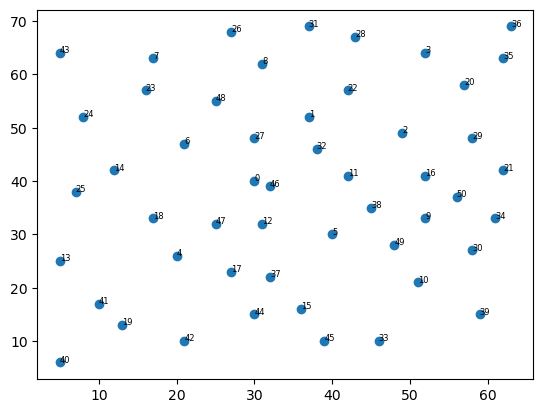

In [30]:
# Plot customers
x = [x for x in data.x]
y = [x for x in data.y]
n = [x for x in range (0,101)]
fig, ax = plt.subplots()
ax.scatter(x, y)
for i, txt in enumerate(n):
    ax.annotate(txt,(x[i], y[i]),fontsize=6)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Plot customers
x = [x for x in data.x]
y = [x for x in data.y]
n = [x for x in range (0,51)]
fig, ax = plt.subplots()
ax.scatter(x, y)
for i, txt in enumerate(n):
    ax.annotate(txt,(x[i], y[i]),fontsize=7)

    
# Plot Routes
colors = ['red', 'green', 'navy', 'fuchsia', 'chocolate', 'orange','purple','lime']

# nodes = [[0,3,2,1,5,4,7,6,8,10,9,0],[0,11,13,12,14,17,15,16,19,0],[0,18,20,21,22,23,25,24,26,0],[0,27,30,29,28,31,33,34,32,36,35,37,0],[0,38,43,41,40,42,44,39,46,47,45,48,0],[0,49,50,0]]
# nodes = [[0,1,9,3,4,2,6,5,8,7,11,10,12,13,15,0],[0,16,14,19,18,17,20,21,22,24,23,27,28,26,25,0],\
#          [0,31,30,29,35,34,33,32,38,37,40,39,36,41,42,43,0],[0,48,47,46,45,44,49,50,52,51,54,55,56,57,0],\
#         [0,53,59,58,61,60,62,63,64,65,67,68,0],[0,66,75,74,72,73,69,70,71,76,77,78,79,82,83,84,0],\
#         [0,80,81,86,85,87,89,88,90,91,93,92,96,0],[0,94,95,97,99,98,100,0]]#c100_aac_2opt


# nodes = [[0,83,84,17,8,45,82,47,36,19,11,90,51,9,81,77,0],[0,69,1,33,50,12,54,55,25,67,23,75,22,41,74,73,0],\
#         [0,53,26,21,15,43,14,38,16,44,37,86,61,91,98,60,0],[0,6,18,62,10,31,30,70,63,64,49,46,48,88,0],\
#         [0,52,7,27,58,13,42,57,2,4,24,29,80,68,76,28,0],[0,34,35,65,66,32,20,71,78,39,56,72,89,0],\
#         [0,59,99,96,40,3,79,87,97,95,0],[0,94,92,100,85,93,5,0]]#HSA in C100

nodes = [[0,41,4,15,33,10,39,9,34,30,38,0],[0,48,8,7,43,14,6,18,50,0],[0,46,5,12,17,42,19,40,13,25,24,0],\
        [0,27,32,1,22,11,2,21,29,28,31,26,23,0],[0,20,35,36,3,16,37,47,44,45,49,0]]#HSA in C50D

for idx, customers in enumerate(nodes):
    
    route = [[[data.x[x], data.y[x]],[data.x[y], data.y[y]]] for x,y in zip (customers[:-1],customers[1:])]
    color = colors[idx]

    for move in route:
        origin, destination = move
        orig_x, orig_y = origin
        dest_x, dest_y = destination

        print('')

        plt.plot((orig_x, dest_x),(orig_y, dest_y), color=color)

plt.show()

In [ ]:
#2-opt for dvrp

def rearrange_list(list_, limit):
    
    results=[]
    
    while True:
        positions = random.sample([x for x in range (limit+1,len(list_)-1)], 2)
    
        min_position, max_position = min(positions), max(positions)
        
        if max_position-min_position>1:
            break
    
    segment = list_[min_position:max_position]

    for i in range (len(segment)):
        
        segment_to_shuffle = copy.deepcopy(segment)
        
        random.shuffle(segment_to_shuffle)
        
        result = list_[0:min_position]+segment_to_shuffle+list_[max_position:]
        
        results.append(result)
        
    return results


In [ ]:
# %%time
b=[0,1,2,3,4,5,0]

trytry=rearrange_list(b,1)
best_soln = []
best_fitness = 999999
for i in trytry:
    print(i)
    dist = data.calculate_distance_list(i)
    print(dist)
    if dist < best_fitness:
        best_fitness = dist
        best_soln = copy.deepcopy(i)
        

In [ ]:
print(best_soln, best_fitness)

In [ ]:
#test: find the best route of a given list

b=[0,1,2,3,4,5,0]

best_soln = []

for i in b:
    best_fitness = 999999
    for j in b:
        print(i)
        dist = data.calculate_distance_list([i,j])
        print(dist)
        if dist < best_fitness and dist !=0 :
            best_fitness = dist
            best_soln = copy.deepcopy(i)
        print()

In [ ]:
print(data.calculate_distance_list([0,1]))
print(data.calculate_distance_list([0,2]))
print(data.calculate_distance_list([0,3]))
print(data.calculate_distance_list([0,4]))
print(data.calculate_distance_list([0,5]))

In [ ]:
print(data.calculate_distance_list([0,1,2]))
print(data.calculate_distance_list([0,1,3]))
print(data.calculate_distance_list([0,1,4]))
print(data.calculate_distance_list([0,1,5]))

In [ ]:
print(data.calculate_distance_list([0,1,2,3]))
print(data.calculate_distance_list([0,1,2,4]))
print(data.calculate_distance_list([0,1,2,5]))

In [ ]:
print(data.calculate_distance_list([0,1,2,3,4,5]))
print(data.calculate_distance_list([0,1,2,3,5,4,7,6,8,10,9,0]))

In [ ]:
a = float(data.calculate_distance_list([0,3,2,1,5,4,7,6,8,10,9,0]))
b = float(data.calculate_distance_list([0,11,13,12,14,17,15,16,19,0]))
c = float(data.calculate_distance_list([0,18,20,21,22,23,25,24,26,0]))
d = float(data.calculate_distance_list([0,27,30,29,28,31,33,34,32,36,35,37,0]))
e = float(data.calculate_distance_list([0,38,43,41,40,42,44,39,46,47,45,48,0]))
f = float(data.calculate_distance_list([0,49,50,0]))
print((a+b+c+d+e+f))

In [ ]:
#butterfly
a = float(data.calculate_distance_list([0,38,9,49,10,39,30,34,21,50,16,11,0]))
b = float(data.calculate_distance_list([0,47,18,13,25,14,0]))
c = float(data.calculate_distance_list([0,12,5,46,0]))
d = float(data.calculate_distance_list([0,37,33,45,15,44,42,19,40,41,4,17,0]))
e = float(data.calculate_distance_list([0,32,2,29,35,36,20,3,28,31,22,1,0]))
f = float(data.calculate_distance_list([0,27,48,8,26,7,43,24,23,6,0]))
print((a+b+c+d+e+f))

In [ ]:
a = float((data.calculate_distance_list([0,41,4,15,33,10,39,9,34,30,38,0])))
b = float((data.calculate_distance_list([0,48,8,7,43,14,6,18,50,0])))
c = float((data.calculate_distance_list([0,46,5,12,17,42,19,40,13,25,24,0])))
d = float((data.calculate_distance_list([0,27,32,1,22,11,2,21,29,28,31,26,23,0])))
e = float((data.calculate_distance_list([0,20,35,36,3,16,37,47,44,45,49,0])))
print((a+b+c+d+e))